# EDA for milestone 1

## Dataset 1 - pldb.csv

This dataset contains extensive information on 4,776 programming languages, with 353 distinct features. These features are categorized into non-technical and technical information. Examples of non-technical information include the year of appearance, the number of published papers, and the country where the programming language was developed. Technical information includes features such as whether the language supports exceptions, pointers, or directives. Our investigation and visualizations primarily focus on the non-technical aspects of programming languages; therefore, exploratory data analysis (EDA) was conducted on these columns.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pldb.csv")
df.head()

,title,appeared,type,pldbId,rank,languageRank,factCount,lastActivity,exampleCount,bookCount,...,features.hasIds,ebook,features.hasExports,features.hasZippers,features.hasMonads,extensionOf,zulip,features.hasImplicitArguments,features.hasDynamicTyping,features.hasMethodChaining
0,Java,1995,pl,java,0,0.0,920,2022,20,401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript,1995,pl,javascript,1,1.0,818,2022,54,351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2,C,1972,pl,c,2,2.0,426,2022,26,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Python,1991,pl,python,3,3.0,691,2022,35,342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SQL,1974,queryLanguage,sql,4,4.0,324,2022,6,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Numerical Columns

- Number of programming language users
- Github big query repositories
- Number of books related to each programming languages
- Number of papers published about the programming languages
- Number of jobs utilizing each programming languages
- Number of wikipedia views about the programming language each day
- Number of Github repositories written in the programming language
- Number of trending projects in Github with the programming language

In [24]:
def show(col):
  top_30_users = df.sort_values(by=col, ascending=False).head(30)

  plt.figure(figsize=(12, 8))
  sns.barplot(y="title", x=col, data=top_30_users, palette="viridis")
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel("Language")

  for i, v in enumerate(top_30_users[col]):
      plt.text(v, i, str(v), color='black', ha='left', va='center')
  plt.show()

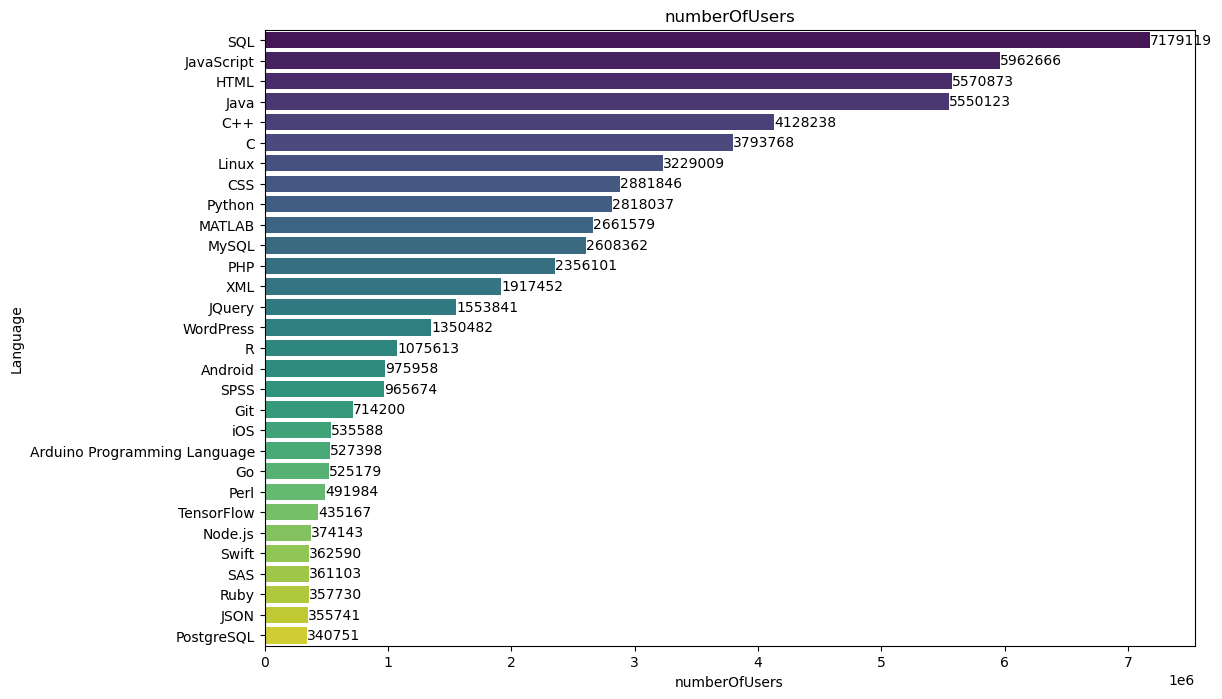

In [25]:
show("numberOfUsers")

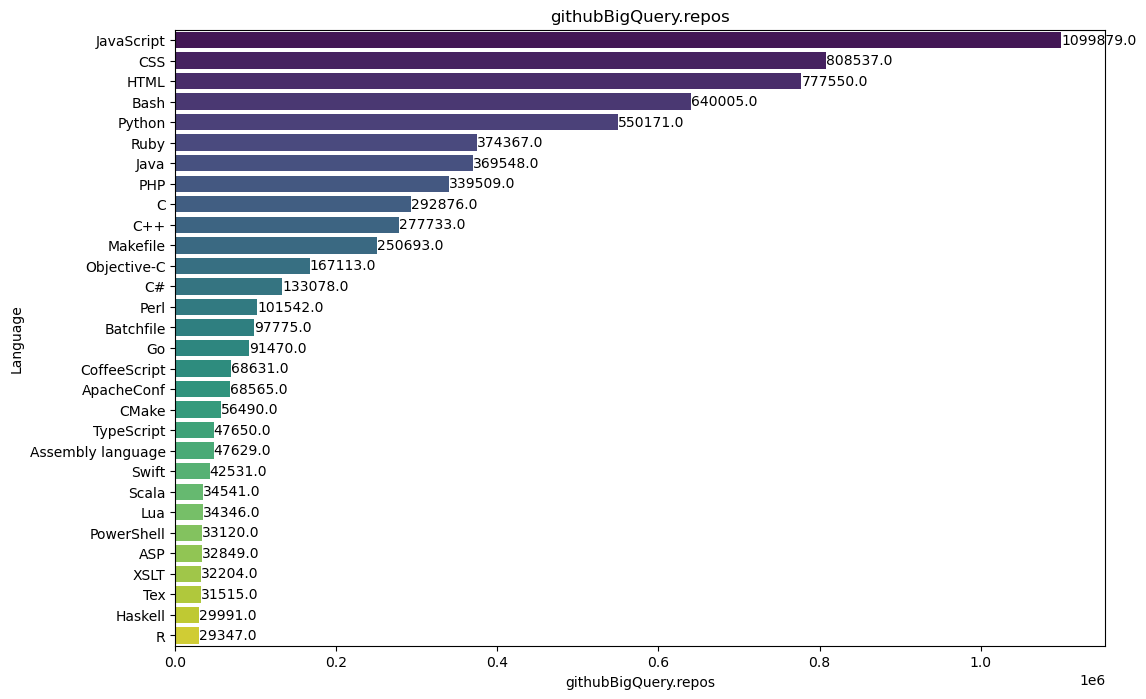

In [26]:
show("githubBigQuery.repos")

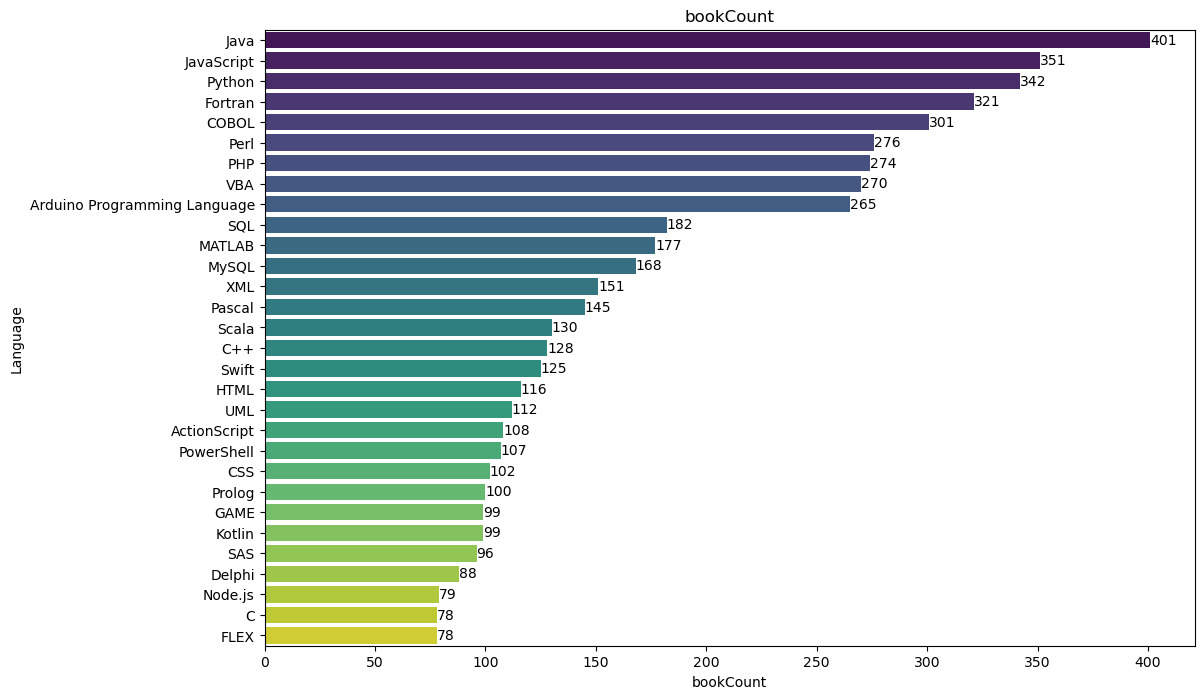

In [27]:
show("bookCount")

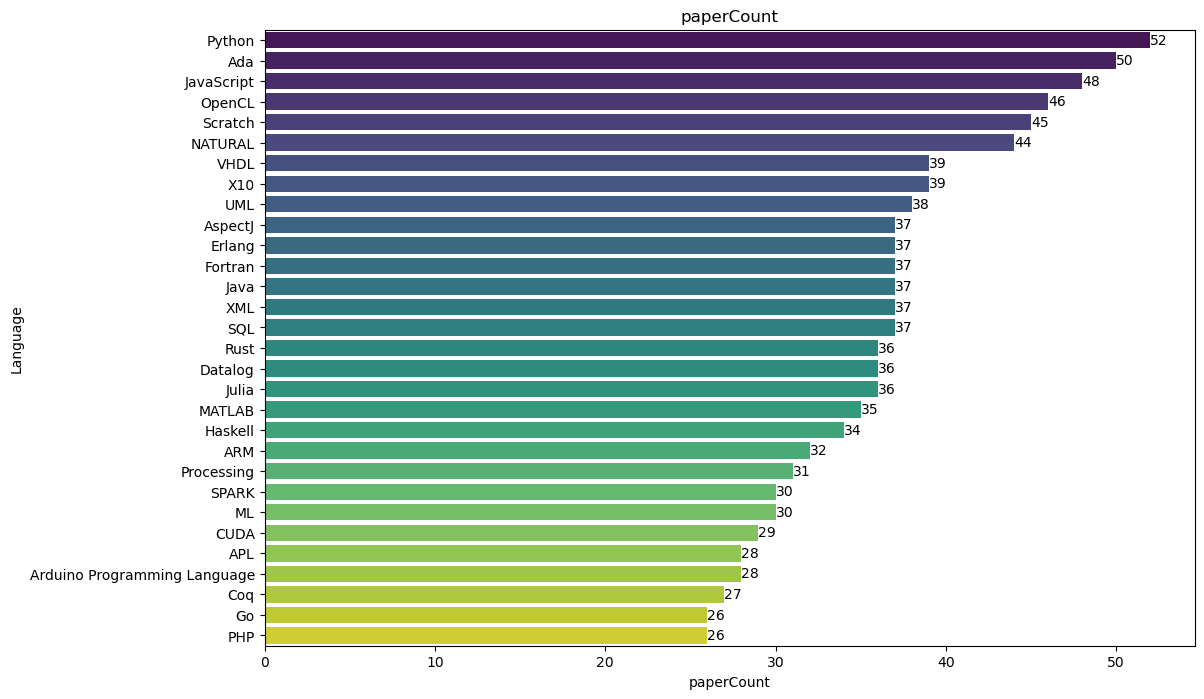

In [28]:
show("paperCount")

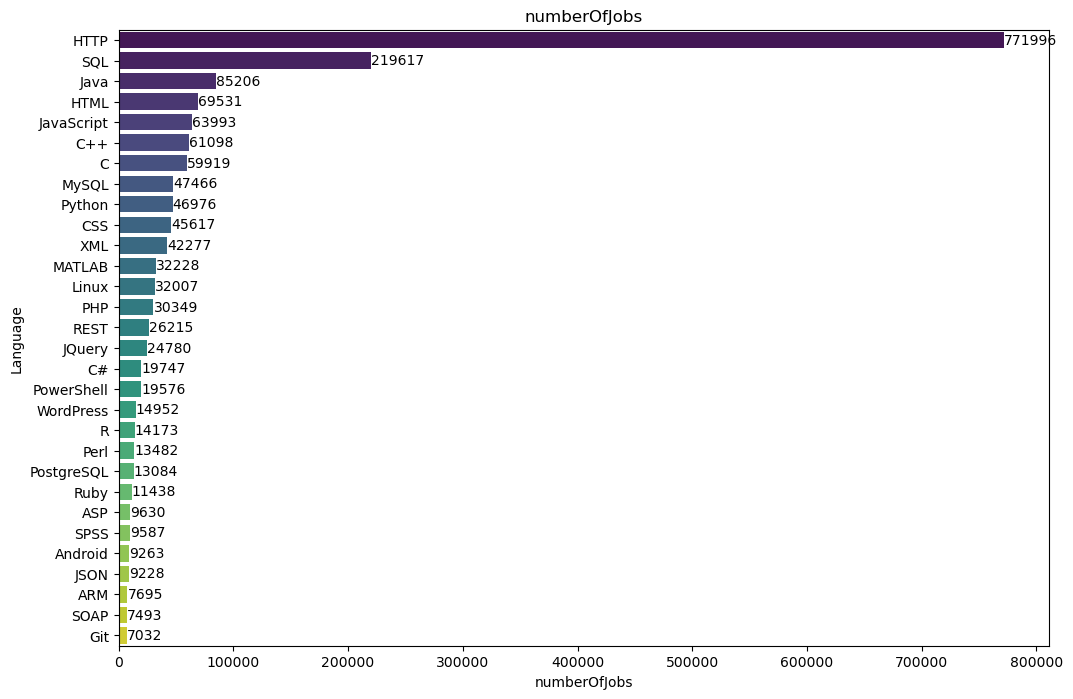

In [29]:
show("numberOfJobs")

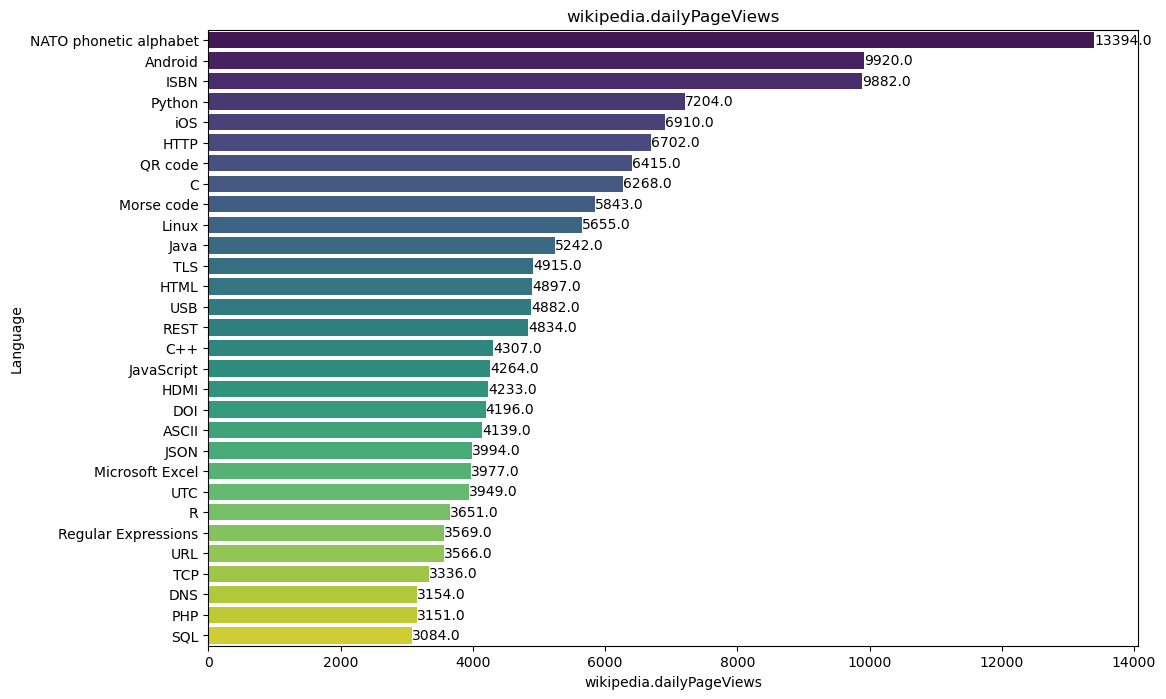

In [30]:
show("wikipedia.dailyPageViews")

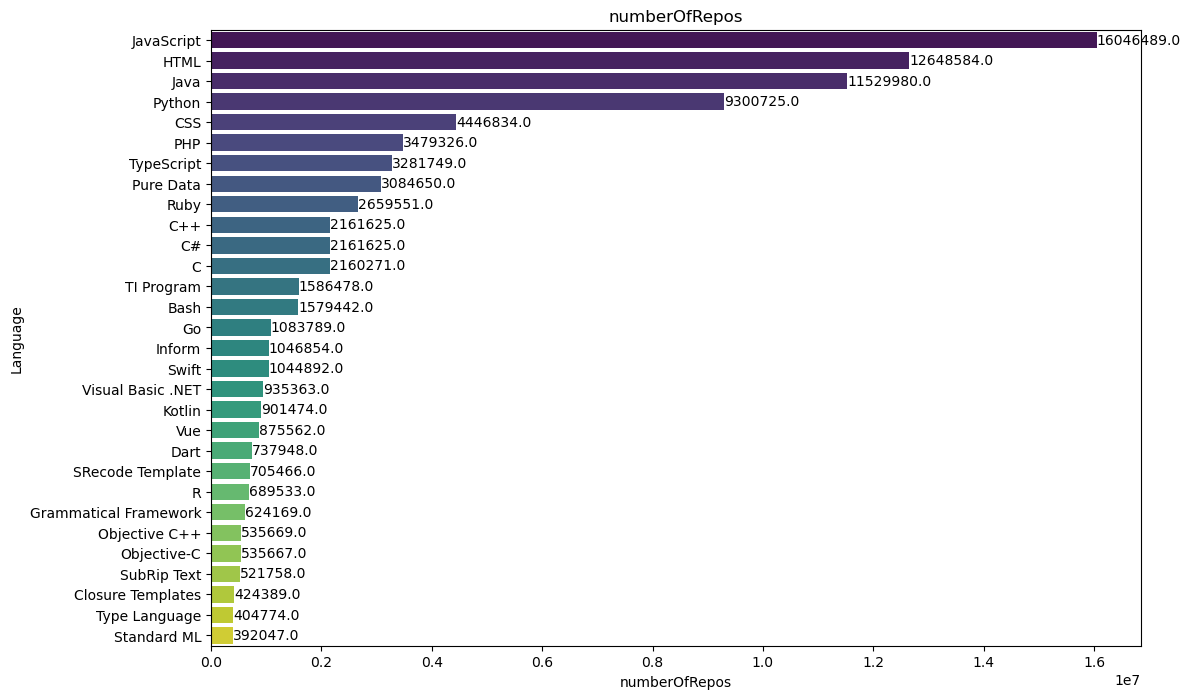

In [31]:
show("numberOfRepos")

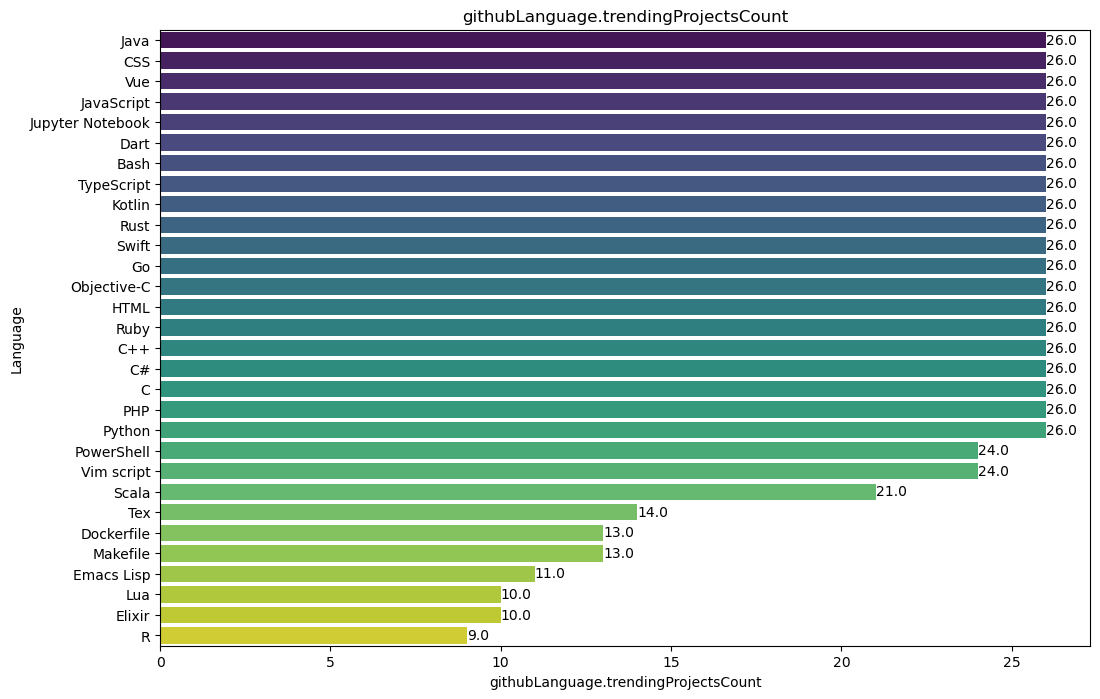

In [32]:
show("githubLanguage.trendingProjectsCount")

### Categorical Columns

- Number of programming languages developed from each countries
- Number of programmin languages developed since 1950

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def show_cat(column_name, flabel, nlargest):
    try:
        value_counts = df[column_name].value_counts().nlargest(nlargest)

        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.title(f"Top {nlargest} Frequencies of {column_name}")
        plt.xticks(rotation=45, ha='right') 

        if flabel:
          for i, v in enumerate(value_counts.values):
              plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")

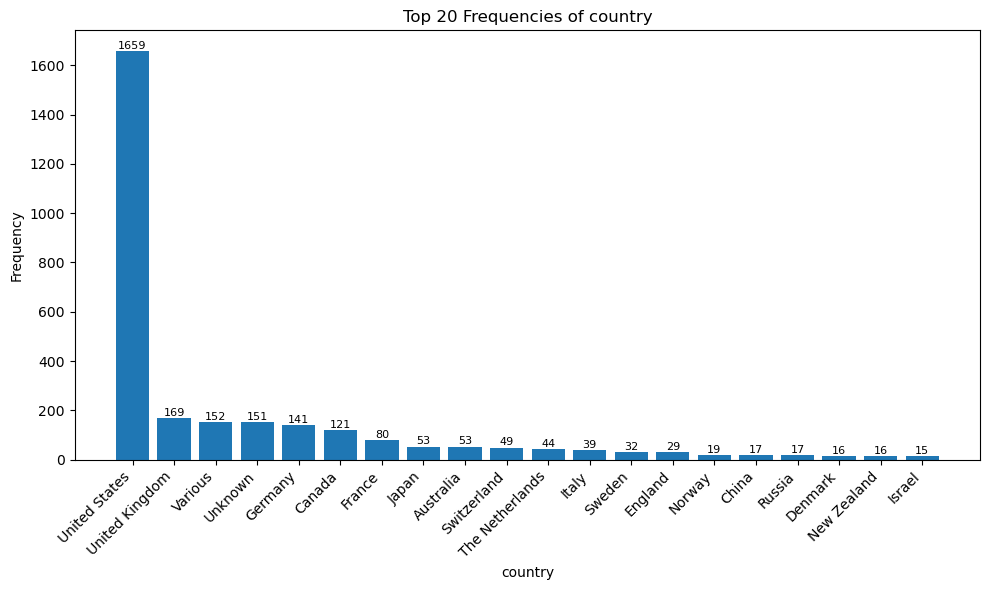

In [34]:
show_cat("country", True, 20)

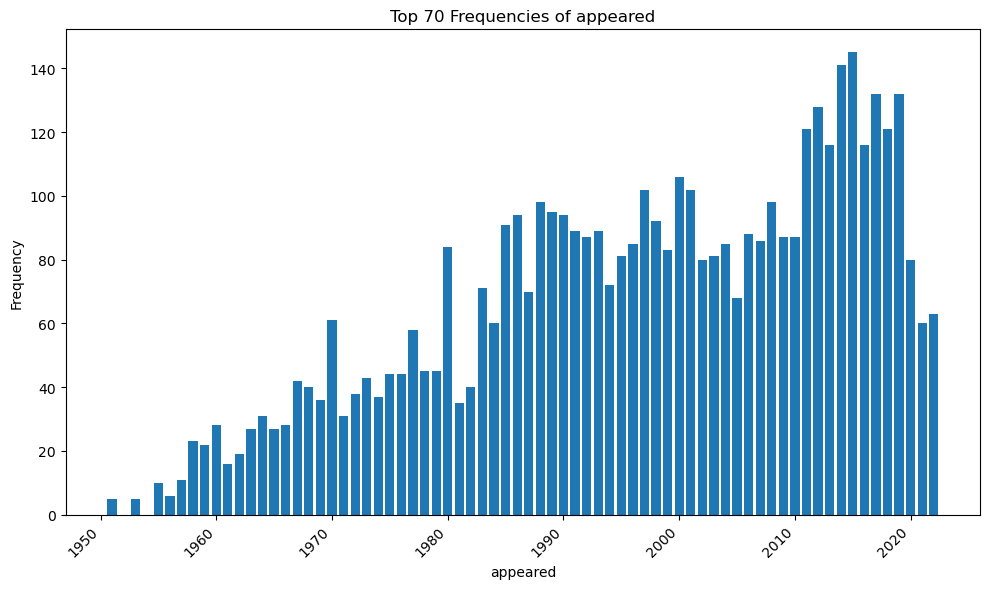

In [35]:
show_cat('appeared', False, 70)

commit